In [394]:
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from panel import widgets
exchange = 'BINANCE'


import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [395]:
mcs_path = Path("Data_files/mc_df.csv")
mc_df = pd.read_csv(mcs_path, index_col=[0])
mc_df.index.name="Days"
mc_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Days,,,,,,,,,,,,,,,,,,,,,
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.472227e+03,-3.883442e+03,6.260111e+02,3.052788e+03,4.858339e+03,-1.235125e+03,3.704776e+03,4.509246e+03,-6.737740e+03,8.019029e+02,...,-5.586343e+03,2.637343e+03,-4.582762e+03,-3.720018e+03,3.493685e+03,-1.461504e+03,5.220109e+03,1.156000e+03,-7.957689e+02,-7.162897e+03
2,-3.533481e+06,1.050928e+06,2.291741e+06,2.239198e+06,1.587720e+07,1.520439e+05,-8.263126e+06,1.603646e+07,3.108474e+07,3.397544e+06,...,-5.705160e+06,3.823130e+06,2.088591e+07,1.317705e+07,4.479564e+05,-3.585990e+06,1.280220e+07,-2.833303e+06,-8.656319e+05,1.023415e+07
3,-2.143222e+10,-2.644423e+09,1.542244e+09,-5.681022e+09,3.064826e+10,-1.222193e+09,1.890773e+10,2.679961e+10,-3.254211e+10,-1.816036e+10,...,-1.994274e+10,-1.107631e+09,1.770386e+10,-1.352507e+10,-4.140994e+08,-7.047310e+09,6.179916e+10,6.371048e+09,3.091185e+09,2.484868e+10
4,7.308080e+13,-1.119448e+13,-3.091040e+12,1.460925e+13,5.580970e+13,-7.147744e+12,-3.335577e+13,7.822449e+13,-1.705445e+14,-1.132595e+13,...,-1.387933e+13,1.262339e+12,-1.694314e+13,1.133164e+13,8.955315e+11,4.544842e+13,-6.077896e+13,2.984711e+13,-2.637018e+12,4.915890e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,inf,-inf,inf,-inf,inf,inf,-inf,inf,-inf,-inf,...,-inf,inf,-inf,-inf,-inf,inf,-inf,inf,-inf,-inf
123,inf,-inf,inf,-inf,inf,inf,-inf,inf,-inf,-inf,...,-inf,inf,-inf,-inf,-inf,inf,-inf,inf,-inf,-inf
124,inf,-inf,inf,-inf,inf,inf,-inf,inf,-inf,-inf,...,-inf,inf,-inf,-inf,-inf,inf,-inf,inf,-inf,-inf


In [396]:
#use dataframe of stats for daily returns of simulation from aarons part as well
mc_path = Path("Data_files/mc_stats.csv")
df_simulated_returns = pd.read_csv(mc_path, index_col=[0])
df_simulated_returns.index.name="Days"
df_simulated_returns


,mean,median,min,max
Days,,,,
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,-9.870424e+01,8.977056e+01,-6.563016e+03,7.094317e+03
2,-2.135845e+06,-7.310869e+04,-3.046209e+07,3.259091e+07
3,-8.513064e+08,-3.515669e+08,-1.059473e+11,1.140919e+11
4,1.549379e+13,3.663871e+11,-2.476340e+14,7.556594e+14
...,...,...,...,...
122,NaN,NaN,-inf,inf
123,NaN,NaN,-inf,inf
124,NaN,NaN,-inf,inf


In [397]:
print("What is your budget for your first investment?")
answer=input("")
print(f"You've chosen to invest {answer} in a diverse cryptocurrency portfolio!")
print("This simulation can help you visualize the kind of returns your initial investment might produce.")



What is your budget for your first investment?


 60000


You've chosen to invest 60000 in a diverse cryptocurrency portfolio!
This simulation can help you visualize the kind of returns your initial investment might produce.


In [398]:
# Set initial investment
initial_investment = int(answer)

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
Days,,,,
0,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
1,-5.922254e+06,5.386234e+06,-3.937810e+08,4.256590e+08
2,-1.281507e+11,-4.386521e+09,-1.827725e+12,1.955455e+12
3,-5.107838e+13,-2.109402e+13,-6.356837e+15,6.845513e+15
4,9.296275e+17,2.198323e+16,-1.485804e+19,4.533956e+19


crypataras_picks = pd.read_csv('Data_files/cryptaras_final_cryptos.csv', index_col=[0])
crypataras_picks = crypataras_picks.values.tolist()
type(crypataras_picks)

In [484]:
#read in COINBASE ticker dataframe
df_daily = pd.read_csv('Data_files/daily_ohlc.csv', index_col=[0])
crypataras_picks = pd.read_csv('Data_files/cryptaras_final_cryptos.csv', index_col=[0])
crypataras_picks = crypataras_picks.values.tolist()

ticker_1_df = pd.read_csv('Data_files/ticker_1.csv', index_col=[0])
ticker_2_df = pd.read_csv('Data_files/ticker_2.csv', index_col=[0])
ticker_3_df = pd.read_csv('Data_files/ticker_3.csv', index_col=[0])
ticker_4_df = pd.read_csv('Data_files/ticker_4.csv', index_col=[0])
ticker_5_df = pd.read_csv('Data_files/ticker_5.csv', index_col=[0])
df_daily.index.name = "Date"

ticker_1_df.index.name = "Date" 
ticker_2_df.index.name = "Date"
ticker_3_df.index.name = "Date"
ticker_4_df.index.name = "Date"
ticker_5_df.index.name = "Date"

#round volume to 2 decimals for plots
ticker_1_df['volume']=ticker_1_df['volume'].round(2)
ticker_2_df['volume']=ticker_2_df['volume'].round(2)
ticker_3_df['volume']=ticker_3_df['volume'].round(2)
ticker_4_df['volume']=ticker_4_df['volume'].round(2)
ticker_5_df['volume']=ticker_5_df['volume'].round(2)

#.loc COINBASE tickers Symbol, Open, High, Low, Close, Volume data as new df
ticker_1_df=ticker_1_df.tail(60).reset_index()
ticker_2_df=ticker_2_df.tail(60).reset_index()
ticker_3_df=ticker_3_df.tail(60).reset_index()
ticker_4_df=ticker_4_df.tail(60).reset_index()
ticker_5_df=ticker_5_df.tail(60).reset_index()

In [485]:

print("When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.") 
print("When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.")




When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.
When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.


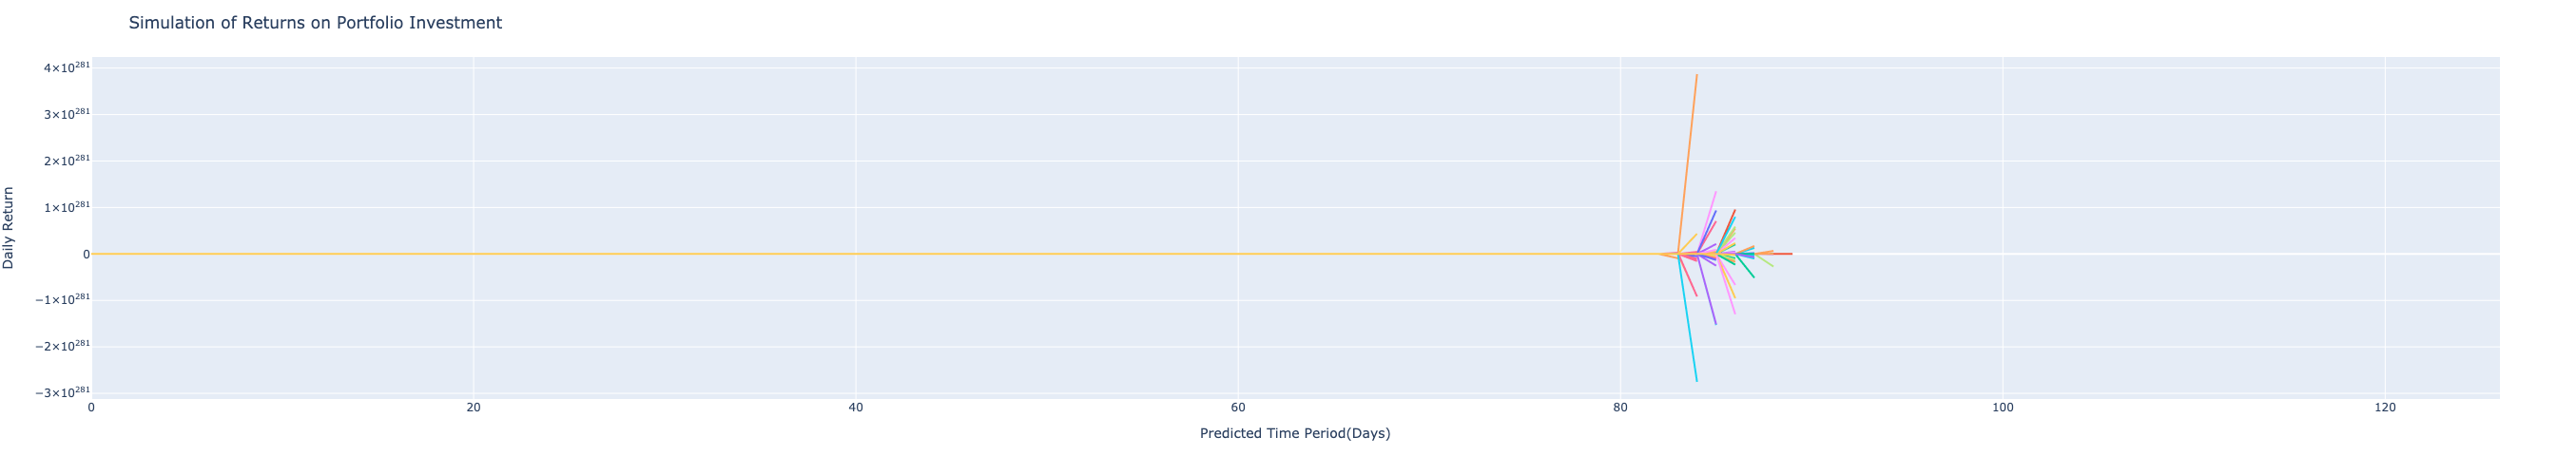

In [486]:
# dashboard components

# mcsftool plot simulation (120)
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')
fig1=fig1.update_layout(
    height=500,
    width=1100)
fig1

In [487]:
#stat plot 
fig2 = go.Figure()
fig2 = fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2 =fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")


In [488]:
#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig3 = go.Figure()
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 =fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title=f"{initial_investment} Initial Investment - Predicted Earnings")

In [489]:
# calculate sma and std for upper and lower bb for each df in df_list
df_list = [ticker_1_df, ticker_2_df, ticker_3_df, ticker_4_df, ticker_5_df]
WINDOW=30
for df in df_list:
    df['sma'] = df['close'].rolling(WINDOW).mean()
    df['std'] = df['close'].rolling(WINDOW).std(ddof = 0)

In [490]:
# RSI PLOT 1
# Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
rsi_plot1 = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{ticker_1_df.symbol[0]} Relative Strength Index', None), vertical_spacing = 0.2, row_heights = [1.2, .8])

# Candlestick Plot
rsi_plot1=rsi_plot1.add_trace(go.Candlestick(x = ticker_1_df['Date'],
                             open = ticker_1_df['open'],
                             high = ticker_1_df['high'],
                             low = ticker_1_df['low'],
                             close = ticker_1_df['close'], showlegend=False,
                             increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                             name = 'candlestick'),
              row = 1, col = 1)

# Moving Average
rsi_plot1=rsi_plot1.add_trace(go.Scatter(x = ticker_1_df['Date'],
                         y = ticker_1_df['sma'],
                         line_color = 'black',
                         name = 'sma'),
              row = 1, col = 1)

# Upper Bound
rsi_plot1=rsi_plot1.add_trace(go.Scatter(x = ticker_1_df['Date'],
                         y = ticker_1_df['sma'] + (ticker_1_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
rsi_plot1=rsi_plot1.add_trace(go.Scatter(x = ticker_1_df['Date'],
                         y = ticker_1_df['sma'] - (ticker_1_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.5),
              row = 1, col = 1)

# Labels & Titles
rsi_plot1=rsi_plot1.update_layout(
    height=500,
    width=1200,
    xaxis_title="Volume(Millions)",
    yaxis_title="Price",
    legend_title="Indicators",
    )
# ----------------

# Volume Plot
rsi_plot1=rsi_plot1.add_trace(go.Bar(x = df['Date'], y = df['volume'], showlegend=False), 
          row = 2, col = 1)
# Remove range slider; (short time frame)
rsi_plot1=rsi_plot1.update(layout_xaxis_rangeslider_visible=True)
#rsi_plot1.show()

In [491]:
#RSI PLOT 2 
# Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
rsi_plot2 = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{ticker_2_df.symbol[0]} Relative Strength Index', None), vertical_spacing = 0.2, row_heights = [1.2, .8])

# Candlestick Plot
rsi_plot2=rsi_plot2.add_trace(go.Candlestick(x = ticker_2_df['Date'],
                             open = ticker_2_df['open'],
                             high = ticker_2_df['high'],
                             low = ticker_2_df['low'],
                             close = ticker_2_df['close'], showlegend=False,
                             increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                             name = 'candlestick'),
              row = 1, col = 1)

# Moving Average
rsi_plot2=rsi_plot2.add_trace(go.Scatter(x = ticker_2_df['Date'],
                         y = ticker_2_df['sma'],
                         line_color = 'black',
                         name = 'sma'),
              row = 1, col = 1)

# Upper Bound
rsi_plot2=rsi_plot2.add_trace(go.Scatter(x = ticker_2_df['Date'],
                         y = ticker_2_df['sma'] + (ticker_2_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
rsi_plot2=rsi_plot2.add_trace(go.Scatter(x = ticker_2_df['Date'],
                         y = ticker_2_df['sma'] - (ticker_2_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.5),
              row = 1, col = 1)

# Labels & Titles
rsi_plot2=rsi_plot2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Volume(Millions)",
    yaxis_title="Price",
    legend_title="Indicators",
    )
# ----------------

# Volume Plot
rsi_plot2=rsi_plot2.add_trace(go.Bar(x = ticker_2_df['Date'], y = ticker_2_df['volume'], showlegend=False), 
          row = 2, col = 1)
# Remove range slider; (short time frame)
rsi_plot2=rsi_plot2.update(layout_xaxis_rangeslider_visible=True)
#rsi_plot2.show()

In [492]:

#RSI PLOT 3 ticker_3_df
# Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
rsi_plot3 = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{ticker_3_df.symbol[0]} Relative Strength Index', None), vertical_spacing = 0.2, row_heights = [1.2, .8])

# Candlestick Plot
rsi_plot3=rsi_plot3.add_trace(go.Candlestick(x = ticker_3_df['Date'],
                             open = ticker_3_df['open'],
                             high = ticker_3_df['high'],
                             low = ticker_3_df['low'],
                             close = ticker_3_df['close'], showlegend=False,
                             increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                             name = 'candlestick'),
              row = 1, col = 1)

# Moving Average
rsi_plot3=rsi_plot3.add_trace(go.Scatter(x = ticker_3_df['Date'],
                         y = ticker_3_df['sma'],
                         line_color = 'black',
                         name = 'sma'),
              row = 1, col = 1)

# Upper Bound
rsi_plot3=rsi_plot3.add_trace(go.Scatter(x = ticker_3_df['Date'],
                         y = ticker_3_df['sma'] + (ticker_3_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
rsi_plot3=rsi_plot3.add_trace(go.Scatter(x = ticker_3_df['Date'],
                         y = ticker_3_df['sma'] - (ticker_3_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.5),
              row = 1, col = 1)

# Labels & Titles
rsi_plot3=rsi_plot3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Volume(Millions)",
    yaxis_title="Price",
    legend_title="Indicators",
    )
# ----------------
# Volume Plot
rsi_plot3=rsi_plot3.add_trace(go.Bar(x = ticker_3_df['Date'], y = ticker_3_df['volume'], showlegend=False), 
          row = 2, col = 1)
# Remove range slider; (short time frame)
rsi_plot3=rsi_plot3.update(layout_xaxis_rangeslider_visible=True)
#rsi_plot3.show()

In [493]:
#RSI PLOT 4 ticker_4_df

# Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
rsi_plot4 = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{ticker_4_df.symbol[0]} Relative Strength Index', None), vertical_spacing = 0.2, row_heights = [1.2, .8])

# Candlestick Plot
rsi_plot4=rsi_plot4.add_trace(go.Candlestick(x = ticker_4_df['Date'],
                             open = ticker_4_df['open'],
                             high = ticker_4_df['high'],
                             low = ticker_4_df['low'],
                             close = ticker_4_df['close'], showlegend=False,
                             increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                             name = 'candlestick'),
              row = 1, col = 1)

# Moving Average
rsi_plot4=rsi_plot4.add_trace(go.Scatter(x = ticker_4_df['Date'],
                         y = ticker_4_df['sma'],
                         line_color = 'black',
                         name = 'sma'),
              row = 1, col = 1)

# Upper Bound
rsi_plot4=rsi_plot4.add_trace(go.Scatter(x = ticker_4_df['Date'],
                         y = ticker_4_df['sma'] + (ticker_4_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
rsi_plot4=rsi_plot4.add_trace(go.Scatter(x = ticker_4_df['Date'],
                         y = ticker_4_df['sma'] - (ticker_4_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.5),
              row = 1, col = 1)

# Labels & Titles
rsi_plot4=rsi_plot4.update_layout(
    height=500,
    width=1200,
    xaxis_title="Volume(Millions)",
    yaxis_title="Price",
    legend_title="Indicators",
    )
# ----------------

# Volume Plot
rsi_plot4=rsi_plot4.add_trace(go.Bar(x = ticker_4_df['Date'], y = ticker_4_df['volume'], showlegend=False), 
          row = 2, col = 1)
# Remove range slider; (short time frame)
rsi_plot4=rsi_plot4.update(layout_xaxis_rangeslider_visible=True)
#rsi_plot4.show()

In [494]:
#RSI PLOT 5 ticker_5_df

# Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
rsi_plot5 = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{ticker_5_df.symbol[0]} Relative Strength Index', None ), vertical_spacing = 0.2, row_heights = [1.2, .8])

# Candlestick Plot
rsi_plot5=rsi_plot5.add_trace(go.Candlestick(x = ticker_5_df['Date'],
                             open = ticker_5_df['open'],
                             high = ticker_5_df['high'],
                             low = ticker_5_df['low'],
                             close = ticker_5_df['close'], showlegend=False,
                             increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                             name = 'candlestick'),
              row = 1, col = 1)

# Moving Average
rsi_plot5=rsi_plot5.add_trace(go.Scatter(x = ticker_5_df['Date'],
                         y = ticker_5_df['sma'],
                         line_color = 'black',
                         name = 'sma'),
              row = 1, col = 1)

# Upper Bound
rsi_plot5=rsi_plot5.add_trace(go.Scatter(x = ticker_5_df['Date'],
                         y = ticker_5_df['sma'] + (ticker_5_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
rsi_plot5=rsi_plot5.add_trace(go.Scatter(x = ticker_5_df['Date'],
                         y = ticker_5_df['sma'] - (ticker_5_df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.5),
              row = 1, col = 1)

# Labels & Titles
rsi_plot5=rsi_plot5.update_layout(
    height=500,
    width=1200,
    xaxis_title="Volume(Millions)",
    yaxis_title="Price",
    legend_title="Indicators",
    )
# ----------------

# Volume Plot
rsi_plot5=rsi_plot5.add_trace(go.Bar(x = ticker_5_df['Date'], y = ticker_5_df['volume'], showlegend=False), 
          row = 2, col = 1)
# Remove range slider; (short time frame)
rsi_plot5=rsi_plot5.update(layout_xaxis_rangeslider_visible=True)
#rsi_5.show()

In [495]:
#df_list = [ticker_1_df, ticker_2_df, ticker_3_df, ticker_4_df, ticker_5_df]
candle_plot1= go.Figure(
data=[
    go.Candlestick(x=ticker_1_df['Date'],
                   open=ticker_1_df['open'],
                   high=ticker_1_df['high'],
                   low=ticker_1_df['low'],
                   close=ticker_1_df['close'],
                   increasing_line_color= 'olive', decreasing_line_color= 'darkred')
])    
candle_plot1=candle_plot1.update(layout_xaxis_rangeslider_visible=True)
candle_plot1=candle_plot1.update_layout(
    height=500,
    width=1200,
    title=f'{ticker_1_df.symbol[0]} Daily Price',
    xaxis_title='Date',
    yaxis_title='Price (USD)')
#candle_plot1.show()

#---------------------------------------------

#candle 2 ticker 2
candle_plot2= go.Figure(
data=[
    go.Candlestick(x=ticker_2_df['Date'],
                   open=ticker_2_df['open'],
                   high=ticker_2_df['high'],
                   low=ticker_2_df['low'],
                   close=ticker_2_df['close'],
                   increasing_line_color= 'olive', decreasing_line_color= 'darkred')
])    
candle_plot2=candle_plot2.update(layout_xaxis_rangeslider_visible=True)
candle_plot2=candle_plot2.update_layout(
    height=500,
    width=1200,
    title=f'{ticker_2_df.symbol[0]} Daily Price ',
    xaxis_title='Date',
    yaxis_title='Price (USD)')
#candle_plot2.show()

# #---------------------------------------------


#candle 3 ticker 3
candle_plot3= go.Figure(
data=[
    go.Candlestick(x=ticker_3_df['Date'],
                   open=ticker_3_df['open'],
                   high=ticker_3_df['high'],
                   low=ticker_3_df['low'],
                   close=ticker_3_df['close'],
                   increasing_line_color= 'olive', decreasing_line_color= 'darkred')
])    
candle_plot3=candle_plot3.update(layout_xaxis_rangeslider_visible=True)
candle_plot3=candle_plot3.update_layout(
    height=500,
    width=1200,
    title=f'{ticker_3_df.symbol[0]} Daily Price',
    xaxis_title='Date',
    yaxis_title='Price (USD)')
#candle_plot3.show()

# #---------------------------------------------


#candle 4 ticker 4
candle_plot4= go.Figure(
data=[
    go.Candlestick(x=ticker_4_df['Date'],
                   open=ticker_4_df['open'],
                   high=ticker_4_df['high'],
                   low=ticker_4_df['low'],
                   close=ticker_4_df['close'],
                   increasing_line_color= 'olive', decreasing_line_color= 'darkred')
])    
candle_plot4=candle_plot4.update(layout_xaxis_rangeslider_visible=True)
candle_plot4=candle_plot4.update_layout(
    height=500,
    width=1200,
    title=f'{ticker_4_df.symbol[0]} Daily Price',
    xaxis_title='Date',
    yaxis_title='Price (USD)')
#candle_plot4.show()

#---------------------------------------------


# #candle 5 ticker 5
candle_plot5= go.Figure(
data=[
    go.Candlestick(x=ticker_5_df['Date'],
                   open=ticker_5_df['open'],
                   high=ticker_5_df['high'],
                   low=ticker_5_df['low'],
                   close=ticker_5_df['close'],
                   increasing_line_color= 'olive', decreasing_line_color= 'darkred')
])    
candle_plot5=candle_plot5.update(layout_xaxis_rangeslider_visible=True)
candle_plot5=candle_plot5.update_layout(
    height=500,
    width=1200,
    title=f'{ticker_5_df.symbol[0]} Daily Price',
    xaxis_title='Date',
    yaxis_title='Price (USD)')
#candle_plot5.show()

In [496]:
monte_row = pn.Row(fig1)

In [497]:
monte_row2 = pn.Row(fig2)

In [498]:
sim_stats = pn.Column("## Cryptara's Simulated Crypto-Portfolio Performance", monte_row, monte_row2)

In [499]:
investment_sim = pn.Column("## Your Investment's Predicted Outcomes", fig3)

In [500]:
candlestick_row1 = pn.Row(candle_plot1,candle_plot2)

In [501]:
candlestick_row2 = pn.Row(candle_plot3,candle_plot4)

In [502]:
candlestick_row3 = pn.Row(candle_plot5)

In [503]:
candlestick_column = pn.Column("## Daily Candlestick Charts", candlestick_row1,candlestick_row2,candlestick_row3)

In [504]:
row_rsi = pn.Row(rsi_plot1, rsi_plot2)


In [505]:
row2_rsi = pn.Row(rsi_plot3, rsi_plot4)

In [506]:
row3_rsi = pn.Row(rsi_plot5)

In [507]:
column_rsi = pn.Column("## Relative Strength Index Charts: Cryptara's Picks", row_rsi,row2_rsi, row3_rsi)

In [508]:
dashboard = pn.Tabs(
    ("RSI CHART", column_rsi),
    ("Candlestick Charts",candlestick_column),
    ("Simulated Statistics", sim_stats),
    ("Investment Returns",investment_sim),
    
)
dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [2] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)
        [3] Row
            [0] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] Plotly(Figure, visible=False)
            [1] Plotly(Figure, visible=False)
        [2] Row
            [0] Plotly(Figure, visible=False)
            [1] Plotly(Figure, visible=False)
        [3] Row
            [0] Plotly(Figure, visible=False)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] Plotly(Figure, visible=False)
        [2] Row
            [0] Plotly(Figure, visible=False)
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure, visible=False)

In [468]:
pn.serve(dashboard)

Launching server at http://localhost:54827
